# Cervello Dataset

## Istallare i prerequisiti

In [5]:
import subprocess
result = subprocess.run(['pip', 'install', '-r', 'requirements.txt'], stdout=subprocess.PIPE)
result.stdout.decode('utf-8')

'Requirement already satisfied: h5py in /usr/local/lib/python3.5/dist-packages (from -r requirements.txt (line 1)) (2.8.0)\nCollecting pydicom (from -r requirements.txt (line 2))\n  Downloading https://files.pythonhosted.org/packages/43/88/d3c419ab2e753e7651510882a53219373e78fb55294cb247dffd3934ea55/pydicom-1.2.2-py2.py3-none-any.whl (7.0MB)\nRequirement already satisfied: numpy in /usr/local/lib/python3.5/dist-packages (from -r requirements.txt (line 4)) (1.15.2)\nRequirement already satisfied: scipy in /usr/local/lib/python3.5/dist-packages (from -r requirements.txt (line 5)) (1.1.0)\nRequirement already satisfied: sklearn in /usr/local/lib/python3.5/dist-packages (from -r requirements.txt (line 6)) (0.0)\nRequirement already satisfied: matplotlib in /usr/local/lib/python3.5/dist-packages (from -r requirements.txt (line 8)) (3.0.0)\nRequirement already satisfied: six in /usr/local/lib/python3.5/dist-packages (from h5py->-r requirements.txt (line 1)) (1.11.0)\nRequirement already sati

## Composizione esempio
La cartella di esempio ha dei file che iniziano con MR che rappresentano i le varie scansioni del cervello, e un file che inizia con RS con le segmentazioni dei medici (è presente un secondo file che inizia in RS ed è un file matlab con lo stesso contenuto).

In [2]:
import os

DATASET_PATH = './dataset/real/esempio1-20180820T174135Z-001/esempio1'
files = os.listdir(DATASET_PATH)

radio_images_path = [f for f in files if f.startswith('MR')]
print('Case images number:', len(radio_images_path))

rs_files = [f for f in files if f.startswith('RS')]
print('RS images number: ', len(rs_files))

Case images number: 192
RS images number:  2


# Leggere Segmentazione
Leggere segmentazione da file .mat

In [3]:
import h5py

matlab = [f for f in rs_files if f.endswith('.mat')][0]
matlab_path = os.path.join(DATASET_PATH, matlab)

data = h5py.File(matlab_path, 'r')
segmentation_imgs = list(data.get('contours').get('Segmentation'))

# Esempio

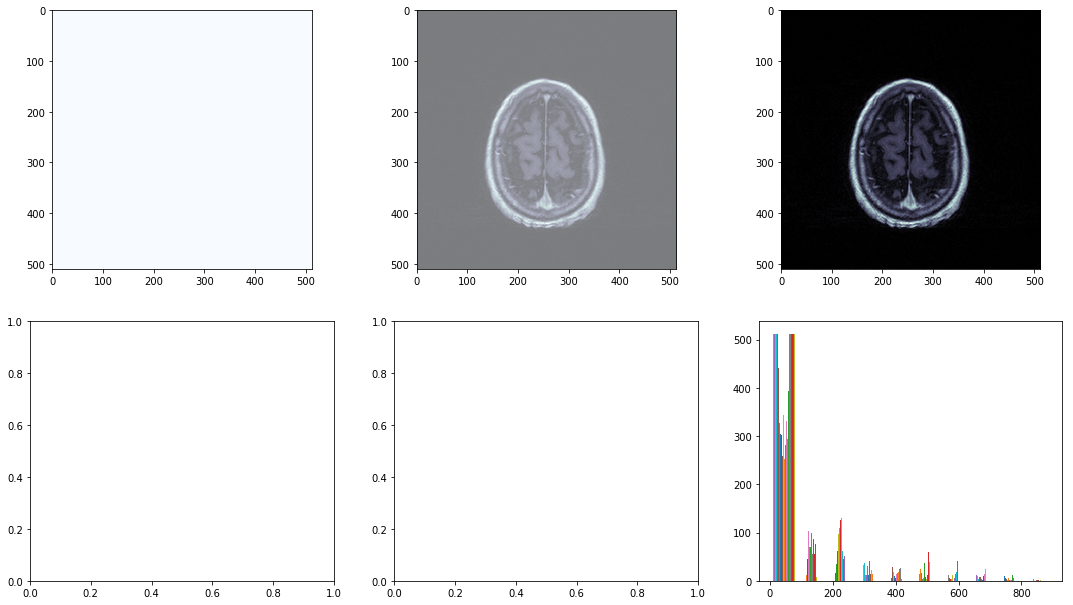

In [7]:
import pydicom
import matplotlib.pyplot as plt

dcm_name = radio_images_path[0]
dcm_path = os.path.join(DATASET_PATH, dcm_name)
ds = pydicom.dcmread(dcm_path)

img = ds.pixel_array
seg_img = segmentation_imgs[ds.InstanceNumber - 1]

def show_images(img, seg_img):
    f, axarr = plt.subplots(2, 3)
    f.set_size_inches(18.5, 10.5)
    axarr[0, 1].imshow(img, cmap=plt.cm.bone)
    axarr[0, 1].imshow(seg_img, cmap="Blues", alpha=0.5)
    axarr[0, 0].imshow(seg_img, cmap="Blues")
    axarr[0, 2].imshow(img, cmap=plt.cm.bone)
    axarr[1, 2].hist(img)
    plt.show()

show_images(img, seg_img)

# Esempio con tumore

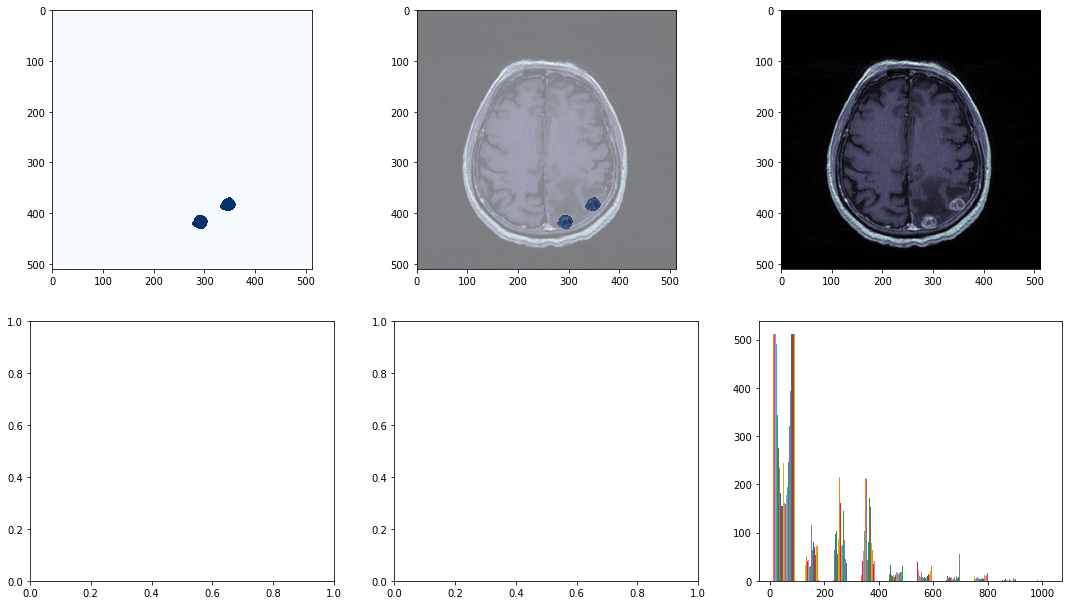

In [6]:
for dcm_name in radio_images_path:
    dcm_path = os.path.join(DATASET_PATH, dcm_name)
    ds = pydicom.dcmread(dcm_path)
    seg_img = segmentation_imgs[ds.InstanceNumber - 1]
    if 1 in seg_img:
        break
img = ds.pixel_array

show_images(img, seg_img)